<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Var" data-toc-modified-id="Var-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Var</a></span></li><li><span><a href="#Init" data-toc-modified-id="Init-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Init</a></span></li><li><span><a href="#LLMGQC" data-toc-modified-id="LLMGQC-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>LLMGQC</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Config" data-toc-modified-id="Config-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Config</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Run</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Notes" data-toc-modified-id="Notes-4.1.0.1"><span class="toc-item-num">4.1.0.1&nbsp;&nbsp;</span>Notes</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Assembly" data-toc-modified-id="Assembly-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Assembly</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Config" data-toc-modified-id="Config-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Config</a></span></li><li><span><a href="#Run" data-toc-modified-id="Run-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>Run</a></span></li></ul></li></ul></li><li><span><a href="#--WAITING--" data-toc-modified-id="--WAITING---6"><span class="toc-item-num">6&nbsp;&nbsp;</span>--WAITING--</a></span><ul class="toc-item"><li><span><a href="#MetaQUAST-summary" data-toc-modified-id="MetaQUAST-summary-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>MetaQUAST summary</a></span><ul class="toc-item"><li><span><a href="#Post-assembly" data-toc-modified-id="Post-assembly-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Post-assembly</a></span></li><li><span><a href="#Post-resmico" data-toc-modified-id="Post-resmico-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Post-resmico</a></span></li><li><span><a href="#Diff-in-contigs-after-filtering" data-toc-modified-id="Diff-in-contigs-after-filtering-6.1.3"><span class="toc-item-num">6.1.3&nbsp;&nbsp;</span>Diff in contigs after filtering</a></span></li></ul></li><li><span><a href="#PR-curve" data-toc-modified-id="PR-curve-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>PR curve</a></span></li></ul></li><li><span><a href="#sessionInfo" data-toc-modified-id="sessionInfo-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>sessionInfo</a></span></li></ul></div>

# Goal

* Assess ResMiCo accuracy with the BMock12 mock community
  * DOI:  https://doi.org/10.1038/s41597-019-0287-z

# Var

In [4]:
work_dir = '/ebio/abt3_projects2/databases_no-backup/DeepMAsED/version2/mock/'

read_dir = file.path(work_dir, 'LLMGQC')
genome_dir = file.path(work_dir, 'ref_genomes', 'MBock12')

# params
threads = 6

# Init

In [5]:
library(dplyr)
library(tidyr)
library(ggplot2)
library(data.table)
library(tidytable)
library(LeyLabRMisc)
Init(threads=threads)

In [6]:
library(PRROC)

# LLMGQC

### Config

In [7]:
config_file = file.path(read_dir, 'config.yaml')
cat_file(config_file)

#-- I/O --#
# table with sample --> read_file information
samples_file: /ebio/abt3_projects2/databases_no-backup/DeepMAsED/version2/mock/LLMGQC/samples.tsv

# output location
output_dir: /ebio/abt3_projects2/databases_no-backup/DeepMAsED/version2/mock/LLMGQC/

# temporary file directory (your username will be added automatically)
tmp_dir: /ebio/abt3_scratch/

# ionice for reducing I/O load (use "-c 2" for noraml I/O usage) 
ionice: -c 3 

#-- Software parameters --#
# See the README for info on all major parameters
# Use "Skip" to skip any of these steps. If no params for rule, use: ""
params:
  just_read1: False
  download:
    dump: --dump-method fasterq-dump --use-prefetch --bufsize 50M
  initial_checks:
    validate_reads: ""
    convert_fastq_to_1.8: ""
  subsample:
    num_reads: Skip
  raw:
    seqkit: ""
    fastqc: ""
  deduplication:
    clumpify: Skip #dedupe=t dupedist=40 optical=t spany=t adjacent=t
    seqkit: ""
    fastqc: ""
  quality:      
    bbduk: ref=./adapters/b

### Run

```
# (base) rick: /tmp/global2/nyoungblut/code/dev/ll_pipelines/llmgqc
screen -L -S llmgqc-mock snakemake /ebio/abt3_projects2/databases_no-backup/DeepMAsED/version2/mock/LLMGQC/config.yaml 30 -F
```

## Summary

In [8]:
F = file.path(work_dir, 'LLMGQC', 'reports', 'final', 'seqkit_stats.tsv')
Fread(F)

Sample,Read,file,format,type,num_seqs,sum_len,min_len,avg_len,max_len,Q1,Q2,Q3,sum_gap,N50,Q20...,Q30...,GC...
<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int64>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
BMock12,1,/ebio/abt3_projects2/databases_no-backup/DeepMAsED/version2/mock/LLMGQC/final/BMock12/R1_final.fq.gz,FASTQ,DNA,209143660,31323356697,100,149.8,151,150,151,151,0,151,97.08,93.40,51.40
BMock12,2,/ebio/abt3_projects2/databases_no-backup/DeepMAsED/version2/mock/LLMGQC/final/BMock12/R2_final.fq.gz,FASTQ,DNA,209143660,31156239500,100,149.0,151,150,151,151,0,151,96.02,91.53,51.37
MBARC-26,1,/ebio/abt3_projects2/databases_no-backup/DeepMAsED/version2/mock/LLMGQC/final/MBARC-26/R1_final.fq.gz,FASTQ,DNA,156480171,23035510442,100,147.2,150,149,150,150,0,150,98.18,90.98,49.26
MBARC-26,2,/ebio/abt3_projects2/databases_no-backup/DeepMAsED/version2/mock/LLMGQC/final/MBARC-26/R2_final.fq.gz,FASTQ,DNA,156480171,22837453225,100,145.9,150,148,150,150,0,150,97.41,88.35,49.18


#### Notes

* A LARGE number of sequences per sample
* I will need to subsample for the metagenome assemblies

# Assembly

### Config

In [10]:
F = file.path(work_dir, 'LLMGA', 'BMock12', 'reads-2mil', 'config.yaml')
cat_file(F)

#-- I/O --#
# table with sample --> read_file information
samples_file: /ebio/abt3_projects2/databases_no-backup/DeepMAsED/version2/mock/LLMGA/BMock12/samples.txt

# output location
output_dir: /ebio/abt3_projects2/databases_no-backup/DeepMAsED/version2/mock/LLMGA/BMock12/reads-2mil/

# temporary file directory (your username will be added automatically)
tmp_dir: /ebio/abt3_scratch/

#-- reference genomes for metacompass --#
metacompass_ref: /ebio/abt3_projects/Anxiety_Twins_Metagenomes/data/metagenome/TUKMZ-BGI250/llmga-find-refs/references/drep/dereplicated_genomes.fna

#-- master control --#
# which major parts of the pipline to run 
run_assembly: True
run_binning: False
run_other_assembly: False

#-- software parameters --#
# Notes:
## see "Notes on the `config.yaml` file" in the README
params:
  # misc
  ionice: -c 3
  use_gpu: True
  # raw reads
  reads:
    subsample: 2000000
    fastqc: ""  
  # metacompass (per-sample ref-based assembly); skipped if using graphbin2
  metacompa

### Run

```
(snakemake) rick: /tmp/global2/nyoungblut/code/dev/ll_pipelines/llmga
$ screen -L -S llmga-BMock12 ./snakemake_sge.sh /ebio/abt3_projects2/databases_no-backup/DeepMAsED/version2/mock/LLMGA/BMock12/reads-2mil/config.yaml 30 -F --notemp
```

## MetaQUAST summary

In [11]:
base_dir = file.path(work_dir, 'LLMGA', 'BMock12', 'reads-2mil')

### Post-assembly

In [12]:
# post-assembly contig report
F = file.path(base_dir, 'final_contigs', 'BMock12', 'metaquast', 'combined_reference', 'report.tsv')
contigs_asmbl = Fread(F) 

df.dims(20)
contigs_asmbl %>% head(n=20)
df.dims()

Assembly,contigs_final
<chr>,<chr>
# contigs (>= 0 bp),3907
# contigs (>= 1000 bp),3907
# contigs (>= 5000 bp),1006
# contigs (>= 10000 bp),523
# contigs (>= 25000 bp),193
# contigs (>= 50000 bp),84
Total length (>= 0 bp),28231094
Total length (>= 1000 bp),28231094
Total length (>= 5000 bp),22294731


In [13]:
# post-assembly misassembly report
F = file.path(base_dir, 'final_contigs', 'BMock12', 'metaquast', 'combined_reference', 
              'contigs_reports', 'contigs_report_contigs_final.mis_contigs.info')
cat_file(F)

contig_414
Extensive misassembly (interspecies translocation) between 919 1 and 1242 1029
contig_430
Extensive misassembly (interspecies translocation) between 1 840 and 841 1158
contig_521
Extensive misassembly (interspecies translocation) between 1 1501 and 1502 9065
contig_588
Extensive misassembly (relocation, inconsistency = -2850) between 3685 1 and 4479 3686
contig_1316
Extensive misassembly (relocation, inconsistency = -3858287) between 1142 1 and 1697 1143
contig_1344
Extensive misassembly (relocation, inconsistency = -2166888) between 1421 1 and 1629 1447
contig_1415
Extensive misassembly (interspecies translocation) between 1 1180 and 1381 1181
contig_1450
Extensive misassembly (interspecies translocation) between 1 526 and 1305 527
contig_1479
Extensive misassembly (relocation, inconsistency = 1498296) between 1 792 and 793 1254
contig_1559
Extensive misassembly (interspecies translocation) between 878 34 and 879 1091
contig_1565
Extensive misassembly (interspecies transloc

### Post-resmico

In [14]:
# post-assembly contig report
F = file.path(base_dir, 'filtered_contigs', 'BMock12', 'metaquast', 'combined_reference', 'report.tsv')
contigs_resmico = Fread(F) 

df.dims(20)
contigs_resmico %>% head(n=20)
df.dims()

Assembly,contigs_filtered
<chr>,<chr>
# contigs (>= 0 bp),3846
# contigs (>= 1000 bp),3846
# contigs (>= 5000 bp),987
# contigs (>= 10000 bp),509
# contigs (>= 25000 bp),183
# contigs (>= 50000 bp),80
Total length (>= 0 bp),27494346
Total length (>= 1000 bp),27494346
Total length (>= 5000 bp),21645567


In [15]:
# post-resmico misassembly report
F = file.path(base_dir, 'filtered_contigs', 'BMock12', 'metaquast', 'combined_reference', 
              'contigs_reports', 'contigs_report_contigs_filtered.mis_contigs.info')
cat_file(F)

contig_1450
Extensive misassembly (interspecies translocation) between 1 526 and 1305 527
contig_1578
Extensive misassembly (relocation, inconsistency = -978467) between 1 932 and 933 1071
contig_1661
Extensive misassembly (relocation, inconsistency = 1742) between 1 3996 and 3997 5492
contig_2144
Extensive misassembly (relocation, inconsistency = -60066) between 3220 1 and 3626 3221
contig_2265
Extensive misassembly (relocation, inconsistency = 7736) between 1 355 and 356 1650
contig_2873
Extensive misassembly (relocation, inconsistency = -77316) between 45254 1 and 60201 45255
contig_3889
Extensive misassembly (interspecies translocation) between 224 1 and 1025 225

### Diff in contigs after filtering

In [16]:
# number of contigs
x = contigs_asmbl %>% 
    filter.(Assembly == '# contigs') %>%
    .$contigs_final %>% first %>% as.numeric

y = contigs_resmico %>% 
    filter.(Assembly == '# contigs') %>%
    .$contigs_filtered %>% first %>% as.numeric

print(x - y)
y / x * 100

[1] 61


[1] 98.4387

In [17]:
# total length
x = contigs_asmbl %>% 
    filter.(Assembly == 'Total length') %>%
    .$contigs_final %>% first %>% as.numeric

y = contigs_resmico %>% 
    filter.(Assembly == 'Total length') %>%
    .$contigs_filtered %>% first %>% as.numeric

y / x * 100

[1] 97.3903

In [18]:
# N50
x = contigs_asmbl %>% 
    filter.(Assembly == 'N50') %>%
    .$contigs_final %>% first %>% as.numeric

y = contigs_resmico %>% 
    filter.(Assembly == 'N50') %>%
    .$contigs_filtered %>% first %>% as.numeric

y / x * 100

[1] 96.88415

## PR curve

In [19]:
# loading resmico scores
F = file.path(base_dir, 'filtered_contigs', 'resmico', 'BMock12', 'predictions.csv.gz')
resmico_scores = Fread(F, sep=',')
resmico_scores

cont_name,length,label,score,min,mean,std,max
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
/ebio/abt3_scratch/nyoungblut/LLMGA_122597181487/resmico/BMock12/contig_1954,1315,0,0.108811356,0.108811356,0.108811356,0,0.108811356
/ebio/abt3_scratch/nyoungblut/LLMGA_122597181487/resmico/BMock12/contig_1955,1315,0,0.002602867,0.002602867,0.002602867,0,0.002602867
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
/ebio/abt3_scratch/nyoungblut/LLMGA_122597181487/resmico/BMock12/contig_975,11902,0,0.02570112,0.02570112,0.02570112,0,0.02570112
/ebio/abt3_scratch/nyoungblut/LLMGA_122597181487/resmico/BMock12/contig_976,11830,0,0.04514008,0.04514008,0.04514008,0,0.04514008


In [20]:
# filtering into class0 & class1 
error_contigs = c('contig_414', 'contig_430', 'contig_521', 'contig_588', 'contig_1316',
                  'contig_1344', 'contig_1415', 'contig_1450', 'contig_1479', 'contig_1559',
                  'contig_1565', 'contig_1578', 'contig_1661', 'contig_2004', 'contig_2036',
                  'contig_2144', 'contig_2193', 'contig_2264', 'contig_2265', 'contig_2784',
                  'contig_2820', 'contig_2840', 'contig_2858', 'contig_2873', 'contig_3140',
                  'contig_3762', 'contig_3869', 'contig_3887', 'contig_3889', 'contig_3890')

# stats
x = contigs_asmbl %>% 
    filter.(Assembly == '# contigs') %>%
    .$contigs_final %>% first %>% as.numeric
cat('No. of contigs', x, '\n')
cat('No. of true misassemblies:', length(error_contigs), '\n')
cat('True error rate:', length(error_contigs) / x * 100, '%\n')

# error contigs
resmico_scores_c0 = resmico_scores %>%
    mutate.(contig_id = basename(cont_name)) %>%
    filter.(contig_id %in% error_contigs)

# background 
resmico_scores_c1 = resmico_scores %>%
    mutate.(contig_id = basename(cont_name)) %>%
    filter.(! contig_id %in% error_contigs)

summary_x(resmico_scores_c0$score)
summary_x(resmico_scores_c1$score)

No. of contigs 3907 
No. of true misassemblies: 30 
True error rate: 0.7678526 %


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
score,0.09121121,0.8720837,0.9572278,0.8814225,0.99703,0.9998567,0.204,0.083


,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.,sd,sd_err_of_mean
score,9.766675e-06,0.003304045,0.01151158,0.08621163,0.06739846,0.9896834,0.17,0.069


In [21]:
pr = pr.curve(scores.class0 = resmico_scores_c0$score, 
              scores.class1 = resmico_scores_c1$score, 
              curve=TRUE)
pr


  Precision-recall curve

    Area under curve (Integral):
     0.7183236 

    Area under curve (Davis & Goadrich):
     0.7182875 

    Curve for scores from  9.766675e-06  to  0.9998567 
    ( can be plotted with plot(x) )


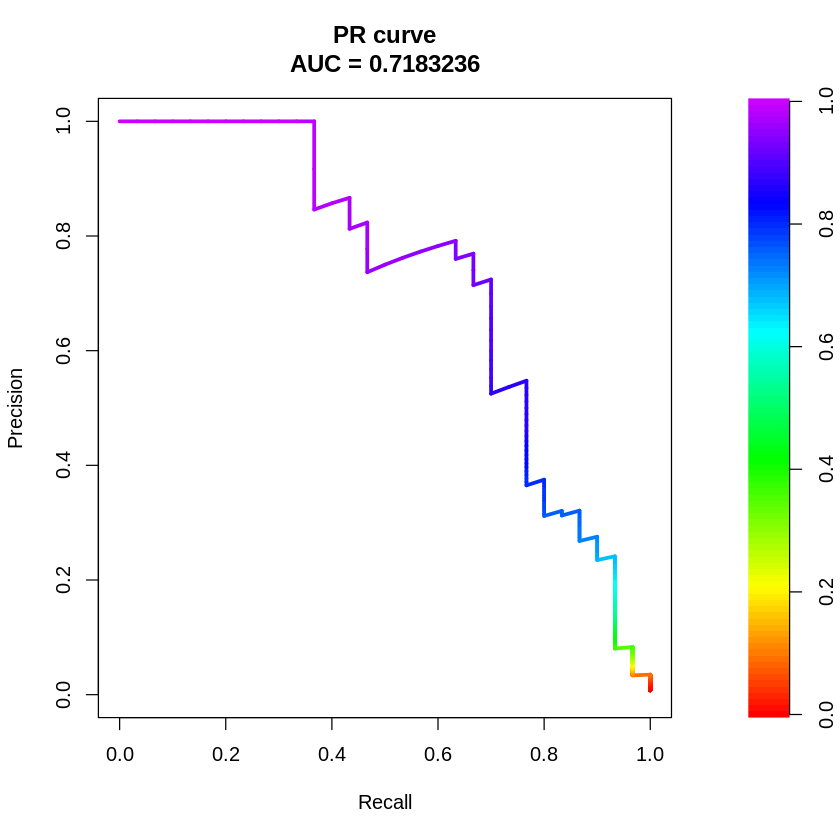

In [22]:
plot(pr)

In [23]:
roc = roc.curve(scores.class0 = resmico_scores_c0$score, 
                scores.class1 = resmico_scores_c1$score, 
                curve=TRUE)
roc


  ROC curve

    Area under curve:
     0.9867509 

    Curve for scores from  9.766675e-06  to  0.9998567 
    ( can be plotted with plot(x) )


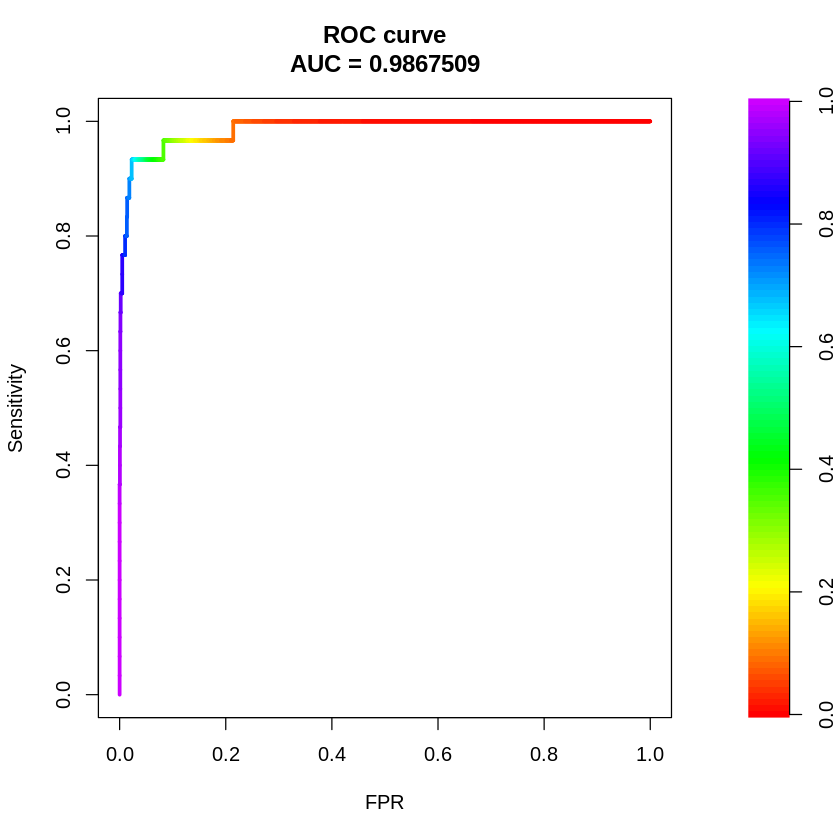

In [24]:
plot(roc)

# sessionInfo

In [25]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS/LAPACK: /ebio/abt3_projects/DeepMAsED/envs/tidyverse/lib/libopenblasp-r0.3.15.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] PRROC_1.3.1        clustermq_0.8.95.1 LeyLabRMisc_0.2.1  tidytable_0.6.3   
[5] data.table_1.14.0  ggplot2_3.3.5      tidyr_1.1.3        dplyr_1.0.7       

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.7        pillar_1.6.1      compiler_4.1.0    plyr_1.8.6       
 [5] R.methods